# EINOPs Tutorial for Tensor Manipulation

### Einstein-Inspired Notation for Operations

In [13]:
!git clone https://github.com/arogozhnikov/einops.git
%cd einops/docs/

/home/dxk/Documents/UNC Archives/School/Y2/SP23/COMP664-Deep-Learning/Supplementals/einops/docs


In [14]:
import numpy as np
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [15]:
ims = numpy.load('./resources/test_images.npy', allow_pickle=False)
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


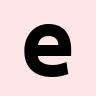

In [49]:
ims[0]

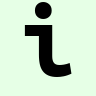

In [19]:
ims[1]

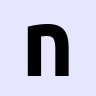

In [20]:
ims[2]

## Part 1: Einops Fundamentals

In [22]:
from einops import rearrange, reduce, repeat

### Transposition

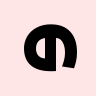

In [31]:
rearrange(ims[0], 'x y z -> y x z') # Can name the axes whatever; maps the two which transposes h and w here

### Composition

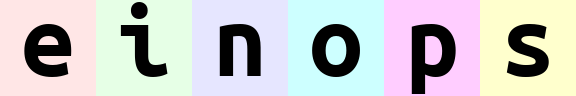

In [38]:
rearrange(ims, ' b h w c ->  h (b w) c')

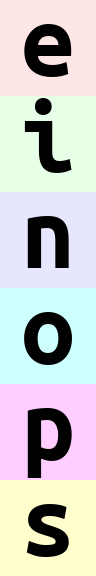

In [42]:
rearrange(ims, ' b h w c -> (b h) w c')

In [43]:
print(rearrange(ims, ' b h w c -> h (b w) c').shape, rearrange(ims, ' b h w c -> (b h) w c').shape)

(96, 576, 3) (576, 96, 3)


In [50]:
rearrange(ims, 'b h w c -> (b h w c)')

array([1.        , 0.90196078, 0.90196078, ..., 1.        , 1.        ,
       0.80392157])
<array of shape (165888,)>


### Decomposition

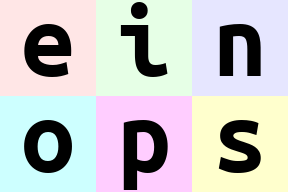

In [68]:
# Since decomposition of a specific axis can happen in more than one way 
# If we want to see 
rearrange(ims, '(b1 b2 b3) h w c -> (b1 b3 h) (b2 w) c ', b1=2, b2 = 3, b3 = 1)

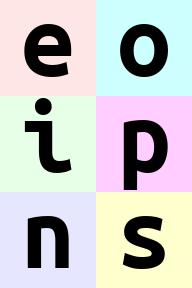

In [72]:
rearrange(ims, '(b1 b2 b3) h w c -> (b2 b3 h) (b1 w) c ', b1=2, b2 = 3, b3 = 1)

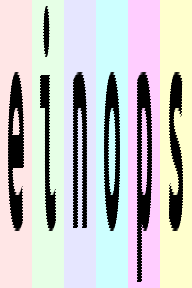

In [76]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=3)

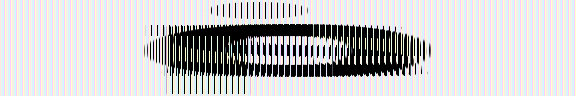

In [77]:
rearrange(ims, 'b h w c -> h (w b) c')

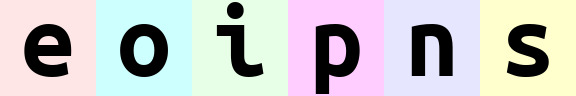

In [79]:
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2) # produces 'einops'

### Reduction in Einops

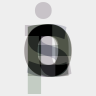

In [80]:
#Average over batch (letter)
reduce(ims, 'b h w c -> h w c', 'mean')


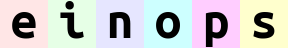

In [81]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)

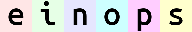

In [89]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=3, w2=3)

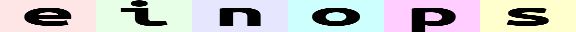

In [87]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'min', h2=3, w2=1)

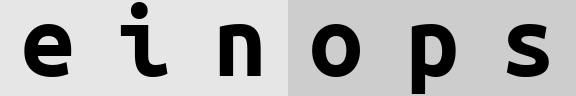

In [97]:
reduce(ims, 'b h w c -> h (b w)', 'min')